In [1]:
# load packages
from imutils import face_utils
import imutils
import dlib
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from face_functions import *

In [2]:
# load the images
image2_name = 'files/artistic_portrait.jpg'
image1_name = 'files/headshot.jpg'

True

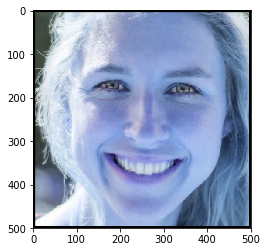

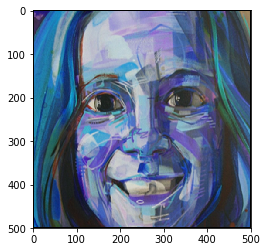

In [3]:
# compute the face cropped file for each image

# for the art image
image1 = cv2.imread(image1_name,cv2.IMREAD_COLOR)
image1_faces, image1_face_detect, image1_cropped, image1_rectangle = compute_face_crop(image1)
image1_cropped = cv2.resize(image1_cropped,(500,500))
image1_cropped_shape = np.shape(image1_cropped)
plt.figure()
plt.imshow(image1_cropped)

# for the headshot image
image2  = cv2.imread(image2_name,cv2.IMREAD_COLOR)
image2_faces, image2_face_detect, image2_cropped, image2_rectangle = compute_face_crop(image2)
image2_cropped = cv2.resize(image2_cropped,(500,500))
image2_cropped_shape = np.shape(image2_cropped)
plt.figure()
plt.imshow(image2_cropped)

cv2.imwrite('files/art_cropped.jpg',image1_cropped)
cv2.imwrite('files/headshot_cropped.jpg',image2_cropped)

cv2.imwrite('files/art_cropped_line.jpg',image2_face_detect)
cv2.imwrite('files/headshot_cropped_line.jpg',image1_face_detect)

In [4]:
# compute the face landmarks
# load the predictor from dlib
p = "files/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

True

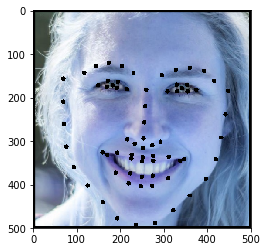

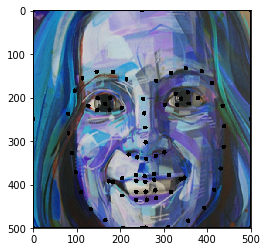

In [5]:
# compute the landmarks in the art and headshot faces
# for the art image
image1_points, image1_points1 = compute_landmarks(image1_cropped,detector,predictor)

# add eye points
l_eye_image1 = image1_points[42:48]
r_eye_image1 = image1_points[36:42]
r_eye_image1_center = find_center(image1_cropped, r_eye_image1)
l_eye_image1_center = find_center(image1_cropped, l_eye_image1)
image1_points.append(r_eye_image1_center)
image1_points.append(l_eye_image1_center)

# find landmarks that correspond to the boundary of the image
image1_points.append((0,0))
image1_points.append((0,image1_cropped_shape[0]))
image1_points.append((image1_cropped_shape[1],image1_cropped_shape[0]))
image1_points.append((image1_cropped_shape[1],0))
image1_points.append((0,image1_cropped_shape[0]/2))
image1_points.append((image1_cropped_shape[1],image1_cropped_shape[0]/2))
image1_points.append((image1_cropped_shape[1]/2,0))
image1_points.append((image1_cropped_shape[1]/2,image1_cropped_shape[0]))

# make sure that none of the final points are on the edge of the image
image1_points1 = []
for (x,y) in image1_points:
    if x >= image1_cropped_shape[1]:
        x = image1_cropped_shape[1] -1
    if y >= image1_cropped_shape[0]:
        y = image1_cropped_shape[0] -1
    image1_points1.append((x,y))
image1_points = image1_points1
        

# add landmarks to image and plot
image1_lm = draw_landmarks(image1_cropped, image1_points)
plt.figure()
plt.imshow(image1_lm)

# for the headshot image
image2_points, image2_points1 = compute_landmarks(image2_cropped,detector,predictor)

# add eye points
l_eye_image2 = image2_points[42:48]
r_eye_image2 = image2_points[36:42]
r_eye_image2_center = find_center(image2_cropped, r_eye_image2)
l_eye_image2_center = find_center(image2_cropped, l_eye_image2)
image2_points.append(r_eye_image2_center)
image2_points.append(l_eye_image2_center)

# find landmarks that correspond to the boundary of the image
image2_points.append((0,0))
image2_points.append((0,image2_cropped_shape[0]))
image2_points.append((image2_cropped_shape[1],image2_cropped_shape[0]))
image2_points.append((image2_cropped_shape[1],0))
image2_points.append((0,image2_cropped_shape[0]/2))
image2_points.append((image2_cropped_shape[1],image2_cropped_shape[0]/2))
image2_points.append((image2_cropped_shape[1]/2,0))
image2_points.append((image2_cropped_shape[1]/2,image2_cropped_shape[0]))

image2_points1 = []
for (x,y) in image2_points:
    if x >= image2_cropped_shape[1]:
        x = image2_cropped_shape[1] -1
    if y >= image2_cropped_shape[0]:
        y = image2_cropped_shape[0] -1
    image2_points1.append((x,y))
image2_points = image2_points1

# add landmarks to image and plot
image2_lm = draw_landmarks(image2_cropped, image2_points)
plt.figure()
plt.imshow(image2_lm)

cv2.imwrite('files/headshot_lm.jpg',image1_lm)
cv2.imwrite('files/art_lm.jpg',image2_lm)

In [6]:
# decide which landmarks to keep (can delete if I want to)
image1_points_final = image1_points
image2_points_final = image2_points

True

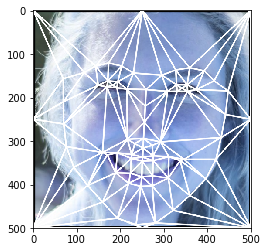

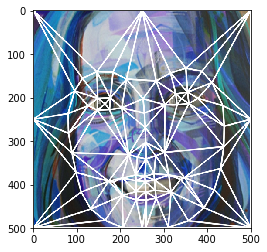

In [7]:
# find the Delaunay Triangulation for each image
dt_image1, image1_triangles = calculateDelaunayTriangles(image1_cropped, image1_points_final)
plt.figure()
plt.imshow(image1_triangles)

# find the Delaunay Triangulation for each image
dt_image2, image2_triangles  = calculateDelaunayTriangles(image2_cropped, image2_points_final)
plt.figure()
plt.imshow(image2_triangles)

cv2.imwrite('files/headshot_triangles.jpg',image1_triangles)
cv2.imwrite('files/art_triangles.jpg',image2_triangles)


True

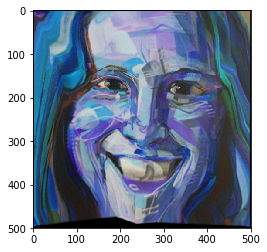

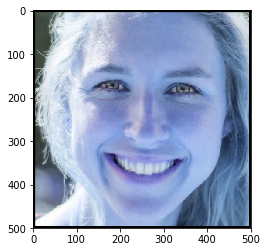

In [8]:
# compute the warped version of the headshot image
image2_warped1 = compute_warped_image(image2_cropped,image1_cropped,dt_image1,image2_points_final,image1_points_final)

plt.figure()
plt.imshow(image2_warped1)
plt.figure()
plt.imshow(image1_cropped)

cv2.imwrite('files/warped_aligned_art.jpg',image2_warped1)
cv2.imwrite('files/warped_aligned_headshot.jpg',image1_cropped)